In [1]:
import sys; sys.path.insert(0, '../')
import geoplot as gplt
import geoplot.crs as ccrs
import geopandas as gpd
import pandas as pd
import numpy as np
import shapely
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
cities = gpd.read_file("../data/cities/citiesx010g.shp")
cities = cities[cities['STATE'].map(lambda s: s not in ['PR', 'AK', 'HI', 'VI'])]

In [3]:
usa = gpd.read_file("../data/united_states/usa.geojson")
continental_usa = usa[~usa['adm1_code'].isin(['USA-3517', 'USA-3563'])]
continental_usa = shapely.ops.cascaded_union(continental_usa.geometry)

(-1597757.3894385984, 1457718.4893930717)

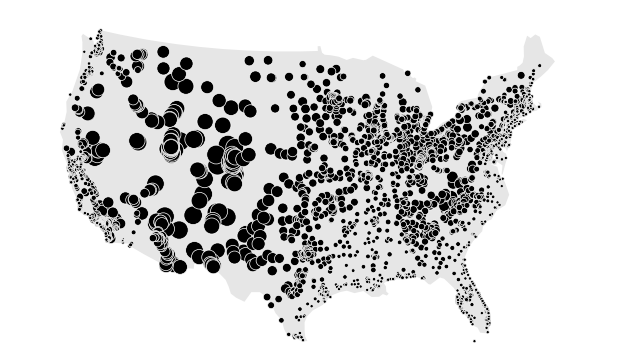

In [52]:
ax = gplt.polyplot(gpd.GeoSeries(continental_usa), projection=ccrs.AlbersEqualArea(),
                   facecolor=(0.9, 0.9, 0.9), zorder=-100, linewidth=0)
gplt.pointplot(cities.query("POP_2010 > 10000"), 
               projection=ccrs.AlbersEqualArea(central_longitude=-98, central_latitude=39.5),
               scale='ELEV_IN_FT', limits=(0.1, 10),
               edgecolor='white', linewidth=0.5, color='black', ax=ax)
ax.set_ylim((-1597757.3894385984, 1457718.4893930717))

(-1597757.3894385984, 1457718.4893930717)

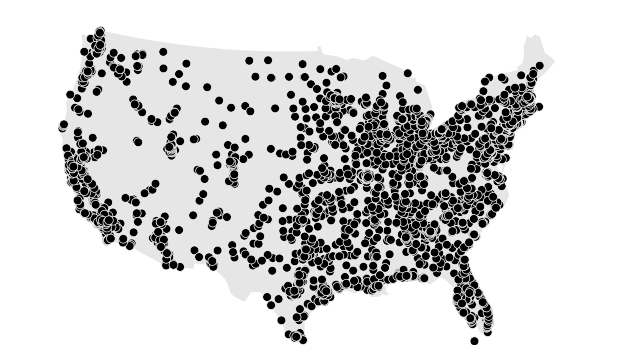

In [15]:
def trivial_scale(minval, maxval):
    def scalar(val):
        return 2
    return scalar

ax = gplt.polyplot(gpd.GeoSeries(continental_usa), projection=ccrs.AlbersEqualArea(),
                   facecolor=(0.9, 0.9, 0.9), zorder=-100, linewidth=0)
gplt.pointplot(cities.query("POP_2010 > 10000"), 
               projection=ccrs.AlbersEqualArea(central_longitude=-98, central_latitude=39.5),
               scale='ELEV_IN_FT', scale_func=trivial_scale,
               edgecolor='white', linewidth=0.5, color='black', ax=ax)
ax.set_ylim((-1597757.3894385984, 1457718.4893930717))

In [57]:
cities.query("POP_2010 > 10000")['ELEV_IN_FT'].min(), cities.query("POP_2010 > 10000")['ELEV_IN_FT'].max()

(-112.0, 7369.0)

In [63]:
np.log10(-112.0 + 113), np.log10(7369.0 + 113)

(0.0, 3.8740177038621861)

In [4]:
import seaborn as sns
sns.reset_orig()

In [1]:
# pd cities.query("POP_2010 > 10000")['ELEV_IN_FT'].plot(kind='bar')

In [12]:
np.log10([1,10,100,1000,8000])

array([ 0.        ,  1.        ,  2.        ,  3.        ,  3.90308999])

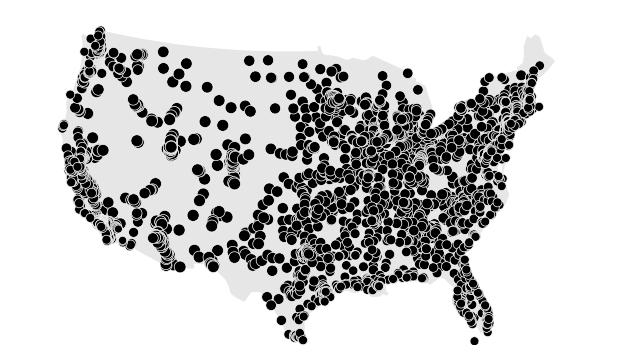

In [14]:
def log_scale(minval, maxval):
    # The minimum value in this dataset is -112, so we need to adjust inputs.
    def scalar(val):
        val = val + abs(minval) + 1
        return np.log10(val)
    return scalar

ax = gplt.polyplot(gpd.GeoSeries(continental_usa), projection=ccrs.AlbersEqualArea(),
                   facecolor=(0.9, 0.9, 0.9), zorder=-100, linewidth=0)
gplt.pointplot(cities.query("POP_2010 > 10000"), 
               projection=ccrs.AlbersEqualArea(central_longitude=-98, central_latitude=39.5),
               scale='ELEV_IN_FT', scale_func=log_scale,
               edgecolor='white', linewidth=0.5, color='black', ax=ax)
ax.set_ylim((-1597757.3894385984, 1457718.4893930717))

(-1597757.3894385984, 1457718.4893930717)

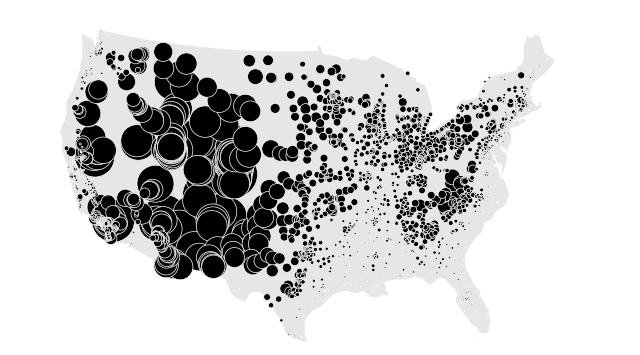

In [26]:
def power_scale(minval, maxval):
    # The minimum value in this dataset is -112, so we need to adjust inputs.
    def scalar(val):
        val = val + abs(minval) + 1
        return (val/1000)**2
    return scalar

ax = gplt.polyplot(gpd.GeoSeries(continental_usa), projection=ccrs.AlbersEqualArea(),
                   facecolor=(0.9, 0.9, 0.9), zorder=-100, linewidth=0)
gplt.pointplot(cities.query("POP_2010 > 10000"), 
               projection=ccrs.AlbersEqualArea(central_longitude=-98, central_latitude=39.5),
               scale='ELEV_IN_FT', scale_func=power_scale,
               edgecolor='white', linewidth=0.5, color='black', ax=ax)
ax.set_ylim((-1597757.3894385984, 1457718.4893930717))

(-1597757.3894385984, 1457718.4893930717)

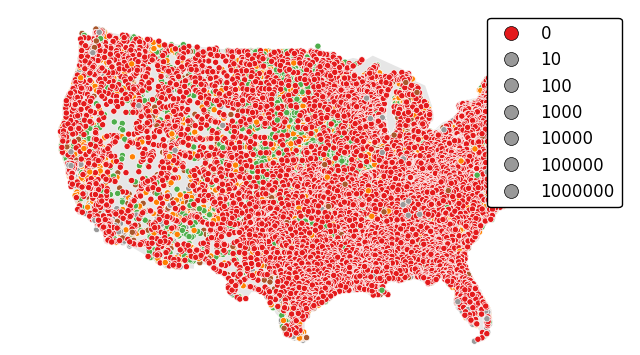

In [41]:
ax = gplt.polyplot(gpd.GeoSeries(continental_usa), projection=ccrs.AlbersEqualArea(),
                   facecolor=(0.9, 0.9, 0.9), zorder=-100, linewidth=0)
gplt.pointplot(cities, 
               projection=ccrs.AlbersEqualArea(central_longitude=-98, central_latitude=39.5),
               hue='POP_2010',
               edgecolor='white', linewidth=0.5, ax=ax,
               legend=True, legend_values=[0, 10, 100, 1000, 10000, 100000, 1000000])
ax.set_ylim((-1597757.3894385984, 1457718.4893930717))

In [49]:
fake_data = 5 + np.array([np.random.normal() for _ in range(len(cities))])

NotImplementedError: Custom hue legend values have not yet been implemented.

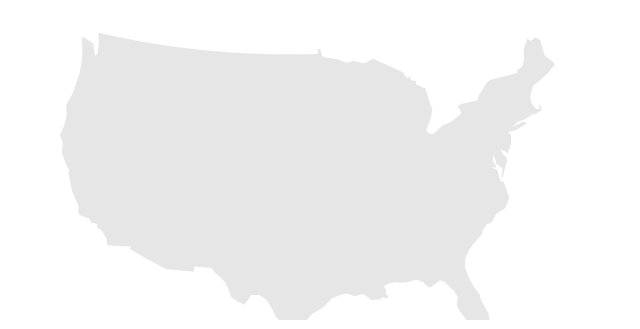

In [82]:
ax = gplt.polyplot(gpd.GeoSeries(continental_usa), projection=ccrs.AlbersEqualArea(),
                   facecolor=(0.9, 0.9, 0.9), zorder=-100, linewidth=0)
gplt.pointplot(cities.sample(500), 
               projection=ccrs.AlbersEqualArea(central_longitude=-98, central_latitude=39.5),
               hue=pd.Series(fake_data).sample(500), ax=ax, legend=True, legend_values=[0.1, 4.3, 4.8, 5.5, 8])
ax.set_ylim((-1597757.3894385984, 1457718.4893930717))

> /Users/Honors/Desktop/geoplot/geoplot/geoplot.py(339)pointplot()
-> _paint_hue_legend(ax, categories, legend_values, legend_labels, cmap, legend_kwargs)
(Pdb) c
0 0.00 - 4.20
1 4.20 - 4.73
2 4.73 - 5.30
3 5.30 - 5.89
4 5.89 - 8.14


(-1597757.3894385984, 1457718.4893930717)

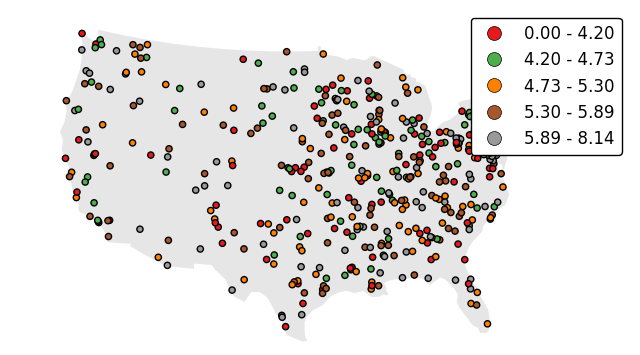

In [58]:
ax = gplt.polyplot(gpd.GeoSeries(continental_usa), projection=ccrs.AlbersEqualArea(),
                   facecolor=(0.9, 0.9, 0.9), zorder=-100, linewidth=0)
gplt.pointplot(cities.sample(500), 
               projection=ccrs.AlbersEqualArea(central_longitude=-98, central_latitude=39.5),
               hue=pd.Series(fake_data).sample(500), ax=ax, legend=True)
ax.set_ylim((-1597757.3894385984, 1457718.4893930717))

ValueError: could not convert string to float: '0.00 - -999.00'

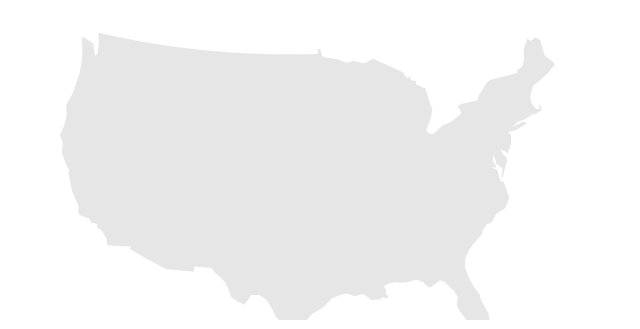

In [40]:
ax = gplt.polyplot(gpd.GeoSeries(continental_usa), projection=ccrs.AlbersEqualArea(),
                   facecolor=(0.9, 0.9, 0.9), zorder=-100, linewidth=0)
gplt.pointplot(cities, 
               projection=ccrs.AlbersEqualArea(central_longitude=-98, central_latitude=39.5),
               hue='POP_2010',
               edgecolor='white', linewidth=0.5, ax=ax,
               legend=True)
ax.set_ylim((-1597757.3894385984, 1457718.4893930717))